In [126]:
import h5py
import numpy as np
from scipy.signal import fftconvolve

from astropy.convolution import Gaussian2DKernel

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

In [2]:
hf = h5py.File("../../.data/Galaxy10_DECals.h5", "r")

In [202]:
im = hf["images"][2100]


In [203]:
img_center = 255 // 2
size = 192
l = img_center - size // 2
r = img_center + size // 2

In [204]:
kernel = Gaussian2DKernel(, 1, 0)

In [207]:
channels = np.arange(3)
rng.shuffle(channels)

im[..., [0, 1, 2]] = im[..., channels]
rot_count = rng.integers(1, 3)
channels, rot_count

mod_img = np.rot90(im, rot_count)[l:r, l:r, :]
print(mod_img.shape)
mod_img = np.transpose([fftconvolve(mod_img[..., i], kernel, mode="valid") for i in range(0, 3)])
mod_img = np.transpose([mod_img[..., i] / 255 for i in range(0, 3)])
mod_img.shape

(192, 192, 3)


(184, 184, 3)

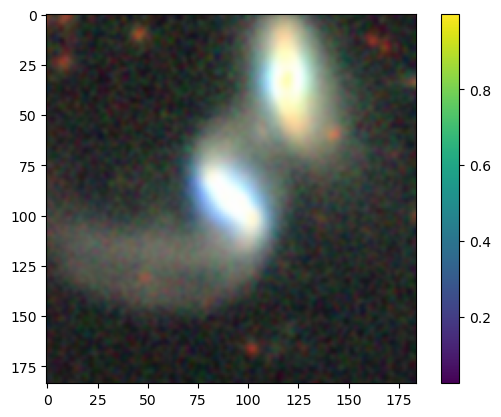

In [208]:
plt.imshow(mod_img)
plt.colorbar()

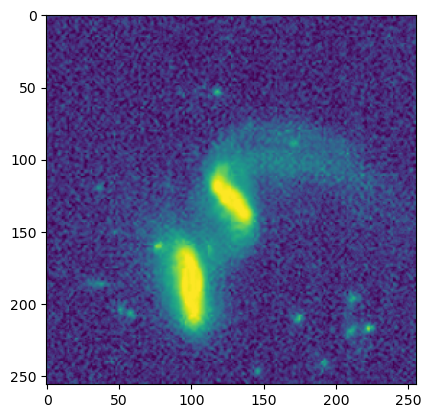

In [209]:
plt.imshow(im[..., 0])

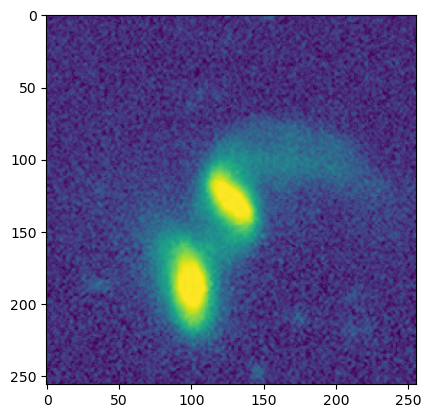

In [210]:
plt.imshow(im[..., 1])

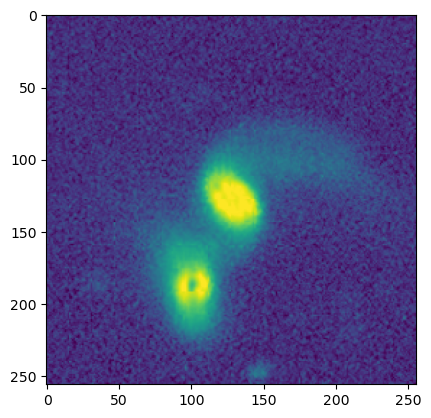

In [211]:
plt.imshow(im[..., 2])